# Explore your favourite novel with Python | 35 minutes | Part I: Preprocessing

## Step 1: Import Libraries & Download NLTK package

In [2]:
from urllib import request # to open urls  
import matplotlib.pyplot as plt

from nltk import pos_tag, RegexpParser # to help mark up words for what part of speech they are in context 
from nltk.corpus import stopwords, wordnet # to get rid of filler words
from nltk.stem import WordNetLemmatizer # to reduce words to their root forms 
from nltk.tokenize import RegexpTokenizer # to chop up text into little bits 
import nltk
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

from matplotlib import transforms
from transformers import pipeline

import spacy
from textblob import TextBlob

# in terminal, may have to run to install
# python.exe -m pip install --upgrade pip
# pip install -q transforms
# pip install tensorflow
# pip install -U spacy
# python -m spacy download en_core_web_sm
# pip install textblob
# python -m textblob.download_corpora


In [3]:
# nltk.download() 

## Step 2: Read in your favourite Gutenberg book 

In [4]:
# construct the download url = for your Gutenberg title, place 5200 with your book's ID number
url = 'https://www.gutenberg.org/files/5200/5200-0.txt'

In [5]:
response = request.urlopen(url)
print(response)

In [6]:
raw = response.read().decode('utf8')
print(raw[1050:1500])


One morning, when Gregor Samsa woke from troubled dreams, he found
himself transformed in his bed into a horrible vermin. He lay on his
armour-like back, and if he lifted his head a little he could see his
brown belly, slightly domed and divided by arches into stiff sections.
The bedding was hardly able to cover it and seemed ready to slide off
any moment. His many legs, pitifully thin compared with the size of the
rest of him, waved abou


In [7]:
type(raw)

str

## Step 3: Normalise text (all lower case) 

In [8]:
normalised = raw.lower()
print(normalised[1050:1500])


one morning, when gregor samsa woke from troubled dreams, he found
himself transformed in his bed into a horrible vermin. he lay on his
armour-like back, and if he lifted his head a little he could see his
brown belly, slightly domed and divided by arches into stiff sections.
the bedding was hardly able to cover it and seemed ready to slide off
any moment. his many legs, pitifully thin compared with the size of the
rest of him, waved abou


## Step 3: Tokenisation & Noise Removal in One Fell Swoop

- there are many ways to skin a cat - FUN! 

> you can use a regular expression on its own, inbuilt Python or you can use an NLTK tokeniser that tokenises *and* removes any character that is not a word at the same time. 
<br>
> I like BOGOF so I went with the package deal. 

In [9]:
tokeniser = RegexpTokenizer(r'\w+') # instantiates a tokeniser combined with a regular expression which selects only words
tokenised = tokeniser.tokenize(normalised)
print(tokenised[160:500])

['i', 'one', 'morning', 'when', 'gregor', 'samsa', 'woke', 'from', 'troubled', 'dreams', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin', 'he', 'lay', 'on', 'his', 'armour', 'like', 'back', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections', 'the', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment', 'his', 'many', 'legs', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him', 'waved', 'about', 'helplessly', 'as', 'he', 'looked', 'what', 's', 'happened', 'to', 'me', 'he', 'thought', 'it', 'wasn', 't', 'a', 'dream', 'his', 'room', 'a', 'proper', 'human', 'room', 'although', 'a', 'little', 'too', 'small', 'lay', 'peacefully', 'between', 'its', 'four', 'familiar', 'walls', 'a', 'collection', 'of', 'textil

## Step 4: Remove stopwords 

In [10]:
stopwords = set(stopwords.words('english')) # defines and grabs English filler words 
print(stopwords)

{'all', 'shouldn', 'themselves', 'did', 'and', 'will', 'on', 'below', "needn't", 'he', 'again', 'into', 'under', "you'll", 'ours', 'a', "mightn't", 'ourselves', 'too', 'couldn', 'no', 'whom', "shan't", 'had', 'this', 'not', 'wasn', 'll', 'me', 'between', "wasn't", 'him', 'so', 'when', "you're", 'its', 'itself', 'while', 'shan', 'am', "it's", "wouldn't", 'won', 'those', 'with', 'through', "you'd", 're', 'there', 'having', 'other', 'ain', 'further', 'yourselves', 'that', 'didn', 'do', 'her', 'an', "won't", 'their', 'if', 'how', 'my', 'ma', 'but', "doesn't", "hadn't", 'it', 'i', 'hasn', "mustn't", "isn't", "shouldn't", 'before', "hasn't", 'been', 'mustn', 'of', 'aren', "she's", 'hers', 'them', 'have', 'she', 'they', 'during', 's', 'is', 'by', 'has', "you've", 'few', 'in', 'isn', 'mightn', 'at', 'down', 'theirs', 'does', 'then', 'once', 'we', 'doing', 'very', 'doesn', 'yours', 'yourself', 'should', 'why', "didn't", 'only', 'being', "couldn't", 'some', 'after', 've', 'our', 'here', 'to', 'w

In [11]:
nostopwords = [word for word in tokenised if word not in stopwords] 
print(nostopwords[95:200])

['one', 'morning', 'gregor', 'samsa', 'woke', 'troubled', 'dreams', 'found', 'transformed', 'bed', 'horrible', 'vermin', 'lay', 'armour', 'like', 'back', 'lifted', 'head', 'little', 'could', 'see', 'brown', 'belly', 'slightly', 'domed', 'divided', 'arches', 'stiff', 'sections', 'bedding', 'hardly', 'able', 'cover', 'seemed', 'ready', 'slide', 'moment', 'many', 'legs', 'pitifully', 'thin', 'compared', 'size', 'rest', 'waved', 'helplessly', 'looked', 'happened', 'thought', 'dream', 'room', 'proper', 'human', 'room', 'although', 'little', 'small', 'lay', 'peacefully', 'four', 'familiar', 'walls', 'collection', 'textile', 'samples', 'lay', 'spread', 'table', 'samsa', 'travelling', 'salesman', 'hung', 'picture', 'recently', 'cut', 'illustrated', 'magazine', 'housed', 'nice', 'gilded', 'frame', 'showed', 'lady', 'fitted', 'fur', 'hat', 'fur', 'boa', 'sat', 'upright', 'raising', 'heavy', 'fur', 'muff', 'covered', 'whole', 'lower', 'arm', 'towards', 'viewer', 'gregor', 'turned', 'look', 'windo

# Step 5: Lemmatise 

Lemmatization converts the word to its meaningful base form, which is called Lemma. 


In [12]:
lemmatiser = WordNetLemmatizer()
print(type(lemmatiser))

<class 'nltk.stem.wordnet.WordNetLemmatizer'>


In [13]:
lemmatise_churches = lemmatiser.lemmatize('churches')
print(lemmatise_churches)

church


In [14]:
lemmatised = [lemmatiser.lemmatize(token) for token in nostopwords]
print(lemmatised[95:200])

['one', 'morning', 'gregor', 'samsa', 'woke', 'troubled', 'dream', 'found', 'transformed', 'bed', 'horrible', 'vermin', 'lay', 'armour', 'like', 'back', 'lifted', 'head', 'little', 'could', 'see', 'brown', 'belly', 'slightly', 'domed', 'divided', 'arch', 'stiff', 'section', 'bedding', 'hardly', 'able', 'cover', 'seemed', 'ready', 'slide', 'moment', 'many', 'leg', 'pitifully', 'thin', 'compared', 'size', 'rest', 'waved', 'helplessly', 'looked', 'happened', 'thought', 'dream', 'room', 'proper', 'human', 'room', 'although', 'little', 'small', 'lay', 'peacefully', 'four', 'familiar', 'wall', 'collection', 'textile', 'sample', 'lay', 'spread', 'table', 'samsa', 'travelling', 'salesman', 'hung', 'picture', 'recently', 'cut', 'illustrated', 'magazine', 'housed', 'nice', 'gilded', 'frame', 'showed', 'lady', 'fitted', 'fur', 'hat', 'fur', 'boa', 'sat', 'upright', 'raising', 'heavy', 'fur', 'muff', 'covered', 'whole', 'lower', 'arm', 'towards', 'viewer', 'gregor', 'turned', 'look', 'window', 'du

In [15]:
print(lemmatised)

['project', 'gutenberg', 'ebook', 'metamorphosis', 'franz', 'kafka', 'ebook', 'use', 'anyone', 'anywhere', 'united', 'state', 'part', 'world', 'cost', 'almost', 'restriction', 'whatsoever', 'may', 'copy', 'give', 'away', 'use', 'term', 'project', 'gutenberg', 'license', 'included', 'ebook', 'online', 'www', 'gutenberg', 'org', 'located', 'united', 'state', 'check', 'law', 'country', 'located', 'using', 'ebook', 'copyrighted', 'project', 'gutenberg', 'ebook', 'detail', 'please', 'follow', 'copyright', 'guideline', 'file', 'title', 'metamorphosis', 'author', 'franz', 'kafka', 'translator', 'david', 'wyllie', 'release', 'date', 'may', '13', '2002', 'ebook', '5200', 'recently', 'updated', 'may', '20', '2012', 'language', 'english', 'character', 'set', 'encoding', 'utf', '8', 'copyright', 'c', '2002', 'david', 'wyllie', 'start', 'project', 'gutenberg', 'ebook', 'metamorphosis', 'metamorphosis', 'franz', 'kafka', 'translated', 'david', 'wyllie', 'one', 'morning', 'gregor', 'samsa', 'woke', '

## Step 6: Parsing Prep - POS tagging

In [16]:
pos_tagged_text = []
pos_tagged_text.append(pos_tag(lemmatised))
print(pos_tagged_text)

[[('project', 'NN'), ('gutenberg', 'NN'), ('ebook', 'NN'), ('metamorphosis', 'NN'), ('franz', 'NN'), ('kafka', 'NN'), ('ebook', 'NN'), ('use', 'NN'), ('anyone', 'NN'), ('anywhere', 'RB'), ('united', 'JJ'), ('state', 'NN'), ('part', 'NN'), ('world', 'NN'), ('cost', 'NN'), ('almost', 'RB'), ('restriction', 'NN'), ('whatsoever', 'NN'), ('may', 'MD'), ('copy', 'VB'), ('give', 'VB'), ('away', 'RP'), ('use', 'JJ'), ('term', 'NN'), ('project', 'NN'), ('gutenberg', 'NN'), ('license', 'NN'), ('included', 'VBD'), ('ebook', 'JJ'), ('online', 'NN'), ('www', 'NN'), ('gutenberg', 'NN'), ('org', 'NN'), ('located', 'VBN'), ('united', 'JJ'), ('state', 'NN'), ('check', 'NN'), ('law', 'NN'), ('country', 'NN'), ('located', 'VBD'), ('using', 'VBG'), ('ebook', 'NN'), ('copyrighted', 'VBN'), ('project', 'NN'), ('gutenberg', 'NN'), ('ebook', 'NN'), ('detail', 'NN'), ('please', 'NN'), ('follow', 'VB'), ('copyright', 'JJ'), ('guideline', 'NN'), ('file', 'NN'), ('title', 'NN'), ('metamorphosis', 'NN'), ('author'

Some resources note that at this point, you could try compiling/searching/matching specific expressions. In my case, I am keeping my exploration open through chunking - no filtering ('chinking') because I do not know yet what I am looking for but you could be specific, eg by including specific character names or certain places. 

## Step 7: Parsing & Chunking

In [17]:
# just to get a rough idea of recurring words

def get_top_10_counts(string_list):
    string_counts = Counter(string_list)
    top_10_counts = dict(sorted(string_counts.items(), key=lambda x: x[1], reverse=True)[:10])
    return top_10_counts

In [18]:
get_top_10_counts(lemmatised)

{'gregor': 298,
 'would': 187,
 'room': 133,
 'could': 120,
 'work': 108,
 'father': 102,
 'sister': 101,
 'gutenberg': 100,
 'door': 97,
 'project': 90}

In [19]:
# personally, I am interested in the actions of the characters, so I selected a verb phrase pattern 
# before moving on to nouns and noun phrases - uncomment depending on which you want to use
# chunk_grammar = "My Phrase: {<VB.><DT>?<JJ>*<NN><RB.?>?}"
chunk_grammar = "My Phrase: {<DT>?<JJ><NN>}"

In [20]:
'''
1. <VB.> matches any verb using the . as a wildcard - this ensures matching verbs of any tense

<br>

2. <DT>?<JJ>*<NN> matches any noun phrase: optional determiner, 0 or more adjectives, a noun

<br>

3. <RB.?> matches any adverb using the . as a wildcard and the optional quantifier to match 0 or 1 occurrence of any character. This ensures matching any form of adverb (regular RB, comparative RBR, or superlative RBS)

'''


'\n1. <VB.> matches any verb using the . as a wildcard - this ensures matching verbs of any tense\n\n<br>\n\n2. <DT>?<JJ>*<NN> matches any noun phrase: optional determiner, 0 or more adjectives, a noun\n\n<br>\n\n3. <RB.?> matches any adverb using the . as a wildcard and the optional quantifier to match 0 or 1 occurrence of any character. This ensures matching any form of adverb (regular RB, comparative RBR, or superlative RBS)\n\n'

In [21]:
cp = RegexpParser(chunk_grammar) 
chunked = cp.parse(pos_tagged_text[0])
print(chunked)

(S
  project/NN
  gutenberg/NN
  ebook/NN
  metamorphosis/NN
  franz/NN
  kafka/NN
  ebook/NN
  use/NN
  anyone/NN
  anywhere/RB
  (My Phrase united/JJ state/NN)
  part/NN
  world/NN
  cost/NN
  almost/RB
  restriction/NN
  whatsoever/NN
  may/MD
  copy/VB
  give/VB
  away/RP
  (My Phrase use/JJ term/NN)
  project/NN
  gutenberg/NN
  license/NN
  included/VBD
  (My Phrase ebook/JJ online/NN)
  www/NN
  gutenberg/NN
  org/NN
  located/VBN
  (My Phrase united/JJ state/NN)
  check/NN
  law/NN
  country/NN
  located/VBD
  using/VBG
  ebook/NN
  copyrighted/VBN
  project/NN
  gutenberg/NN
  ebook/NN
  detail/NN
  please/NN
  follow/VB
  (My Phrase copyright/JJ guideline/NN)
  file/NN
  title/NN
  metamorphosis/NN
  author/NN
  franz/NN
  kafka/NN
  translator/NN
  david/NN
  wyllie/NN
  release/NN
  date/NN
  may/MD
  13/CD
  2002/CD
  ebook/NN
  5200/CD
  recently/RB
  updated/VBD
  may/MD
  20/CD
  2012/CD
  language/NN
  (My Phrase english/JJ character/NN)
  set/VBN
  encoding/VBG
  utf/

## Step 8: Inspect and count chunks

In [22]:
def print_my_chunks_only(chunked):
    for my_chunk in chunked:
        if isinstance(my_chunk, nltk.tree.Tree):
            if my_chunk.label() == "My Phrase":
                print(my_chunk)
                
print(type(chunked))

print_my_chunks_only(chunked[95:150])

<class 'nltk.tree.tree.Tree'>
(My Phrase horrible/JJ vermin/NN)
(My Phrase stiff/JJ section/NN)
(My Phrase able/JJ cover/NN)
(My Phrase slide/JJ moment/NN)
(My Phrase thought/JJ dream/NN)
(My Phrase human/JJ room/NN)
(My Phrase familiar/JJ wall/NN)
(My Phrase table/JJ samsa/NN)


In [23]:
def vp_chunk_counter(chunked):
    
    # create a list to hold chunks
    chunks = list()

    # for-loop through each chunked sentence to extract verb phrase chunks
    for chunked_sentence in chunked:
        for subtree in chunked_sentence.subtrees(filter=lambda t: t.label() == 'My Phrase'):
            chunks.append(tuple(subtree))

    # create a Counter object
    chunk_counter = Counter()

    # for-loop through the list of chunks
    for chunk in chunks:
        # increase counter of specific chunk by 1
        chunk_counter[chunk] += 1

    # return 30 most frequent chunks
    return chunk_counter.most_common(30)

In [24]:
vp_chunked = list()

# create for loop through each pos-tagged sentence in pos_tagged_oz here
for pos_tagged_sentence in pos_tagged_text:
  # chunk each sentence and append to vp_chunked_oz here
  vp_chunked.append(cp.parse(pos_tagged_sentence))
  
# store and print the most common vp-chunks here
most_common_vp_chunks = vp_chunk_counter(vp_chunked)
print(most_common_vp_chunks[0:10])

[((('electronic', 'JJ'), ('work', 'NN')), 27), ((('chief', 'JJ'), ('clerk', 'NN')), 16), ((('united', 'JJ'), ('state', 'NN')), 15), ((('archive', 'JJ'), ('foundation', 'NN')), 11), ((('open', 'JJ'), ('door', 'NN')), 9), ((('little', 'JJ'), ('leg', 'NN')), 8), ((('next', 'JJ'), ('room', 'NN')), 8), ((('mr', 'JJ'), ('samsa', 'NN')), 8), ((('gregor', 'JJ'), ('room', 'NN')), 7), ((('full', 'JJ'), ('project', 'NN')), 7)]


Insights gained so far: 

- Gregor is the main character
- a room is an important story setting
- there is a lot of talk about work, a way (literally or metaphorically), a door, and time 
- important characters include his sister, mother and father
- important recurring themes are family, parents, body parts (leg, hand, head)
- when it comes to descriptive language, open door, little leg, next room, Gregor + a family member feature prominently




## Step 9. Sentiment Analysis

There seem to be quite a variety of models. I started out with a simple binary pipeline (positive or negative sentiments) and then moved on to more nuanced sentiments like joy, sadness, anger, etc, before moving on to a slightly higher level analysis of each sentence.

In [25]:
text_for_pipeline = lemmatised[95:10200]
print(text_for_pipeline)

['one', 'morning', 'gregor', 'samsa', 'woke', 'troubled', 'dream', 'found', 'transformed', 'bed', 'horrible', 'vermin', 'lay', 'armour', 'like', 'back', 'lifted', 'head', 'little', 'could', 'see', 'brown', 'belly', 'slightly', 'domed', 'divided', 'arch', 'stiff', 'section', 'bedding', 'hardly', 'able', 'cover', 'seemed', 'ready', 'slide', 'moment', 'many', 'leg', 'pitifully', 'thin', 'compared', 'size', 'rest', 'waved', 'helplessly', 'looked', 'happened', 'thought', 'dream', 'room', 'proper', 'human', 'room', 'although', 'little', 'small', 'lay', 'peacefully', 'four', 'familiar', 'wall', 'collection', 'textile', 'sample', 'lay', 'spread', 'table', 'samsa', 'travelling', 'salesman', 'hung', 'picture', 'recently', 'cut', 'illustrated', 'magazine', 'housed', 'nice', 'gilded', 'frame', 'showed', 'lady', 'fitted', 'fur', 'hat', 'fur', 'boa', 'sat', 'upright', 'raising', 'heavy', 'fur', 'muff', 'covered', 'whole', 'lower', 'arm', 'towards', 'viewer', 'gregor', 'turned', 'look', 'window', 'du

In [26]:
classifier = pipeline("sentiment-analysis")
positive_or_negative = classifier(text_for_pipeline)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [41]:
print(positive_or_negative[0])

{'label': 'POSITIVE', 'score': 0.9882547855377197}


In [29]:
def positive_or_negative_counter(positive_or_negative):
    count = {'POSITIVE': 0, 'NEGATIVE': 0}
    for item in positive_or_negative:
        label = item['label']
        count[label] += 1
    return count

In [30]:
print(positive_or_negative_counter(positive_or_negative))

{'POSITIVE': 7794, 'NEGATIVE': 2311}


In [31]:
nuanced_classifier = pipeline("text-classification", model='bhadresh-savani/distilbert-base-uncased-emotion', top_k=None)
sentiments = nuanced_classifier(text_for_pipeline)

In [32]:
#print(type(sentiments))

In [33]:
print(sentiments[0])

[{'label': 'anger', 'score': 0.6198245286941528}, {'label': 'joy', 'score': 0.14042465388774872}, {'label': 'fear', 'score': 0.13549461960792542}, {'label': 'sadness', 'score': 0.07383593171834946}, {'label': 'love', 'score': 0.015495975501835346}, {'label': 'surprise', 'score': 0.014924285933375359}]


In [34]:
#print(len(sentiments)) # thats the number of words 

In [35]:
def count_highest_emotions(sentiments):
    emotion_counts = {}
    for sublist in sentiments:
        highest_emotion = None
        highest_score = 0
        for emotion_dict in sublist:
            emotion_label = emotion_dict['label']
            emotion_score = emotion_dict['score']
            if emotion_score > highest_score:
                highest_score = emotion_score
                highest_emotion = emotion_label
        if highest_emotion:
            if highest_emotion not in emotion_counts:
                emotion_counts[highest_emotion] = 1
            else:
                emotion_counts[highest_emotion] += 1
    return emotion_counts

In [36]:
count_highest_emotions(sentiments)

{'anger': 6564,
 'joy': 2013,
 'fear': 1199,
 'sadness': 258,
 'love': 39,
 'surprise': 32}

In [37]:
# using spacy and text blob: 
def analyse_sentiment(text):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(normalised)
    sentences = [sent.text for sent in doc.sents]
    sentiment_counts = {'negative': 0, 'positive': 0, 'neutral': 0}

    for sentence in sentences:
        blob = TextBlob(sentence)
        sentiment_polarity = blob.sentiment.polarity
        if sentiment_polarity < 0:
            sentiment_counts['negative'] += 1
        elif sentiment_polarity > 0:
            sentiment_counts['positive'] += 1
        else:
            sentiment_counts['neutral'] += 1

    return sentiment_counts

In [42]:
sentiment_counts = analyse_sentiment(normalised)

In [39]:
def visualise_sentiment(sentiment_counts):
    labels = sentiment_counts.keys()
    values = sentiment_counts.values()

    fig, ax = plt.subplots()
    ax.bar(labels, values)
    ax.set_ylabel('Count')
    ax.set_title('Sentiment Analysis')

    plt.show()

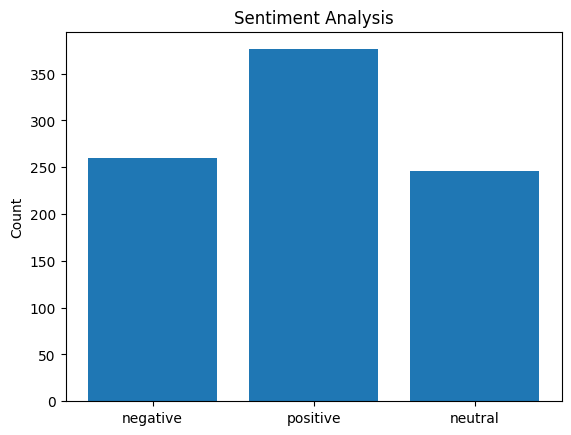

In [40]:
# this is per sentence, as opposed to per word 
visualise_sentiment(sentiment_counts)

### Thanks for your time and attention! 